# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [1]:
# TODO: Make all necessary imports.
# http://pytorch.org/  
%pip --no-cache-dir install tfds-nightly --user
# DON'T MISS TO RESTART THE KERNEL

  Obtaining dependency information for tfds-nightly from https://files.pythonhosted.org/packages/98/e5/588aff44802ba85125fc60abaf249061c02cc0d62e6130c66406ab1d7635/tfds_nightly-4.9.8.dev202504250044-py3-none-any.whl.metadata
  Obtaining dependency information for etils[edc,enp,epath,epy,etree]>=1.9.1 from https://files.pythonhosted.org/packages/dd/71/40ee142e564b8a34a7ae9546e99e665e0001011a3254d5bbbe113d72ccba/etils-1.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for immutabledict from https://files.pythonhosted.org/packages/59/56/25ca7b848164b7d93dbd5fc97dd7751700c93e324fe854afbeb562ee2f98/immutabledict-4.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyarrow from https://files.pythonhosted.org/packages/b8/82/20f3c290d6e705e2ee9c1fa1d5a0869365ee477e1788073d8b548da8b64c/pyarrow-19.0.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for simple_parsing from https://files.pythonhosted.org/packages/4f/9c/e9ea387500

In [2]:
# Import TensorFlow 
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

2025-04-25 20:00:47.273936: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-25 20:00:47.274018: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-25 20:00:47.274115: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# TODO: Make all other necessary imports.
import matplotlib.pyplot as plt
import json
import numpy as np

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [4]:
# Download data to default local directory "~/tensorflow_datasets"
# !python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums=True --datasets=oxford_flowers102

# TODO: Load the dataset with TensorFlow Datasets.
dataset, dataset_info = tfds.load('oxford_flowers102', as_supervised=True, with_info=True)

# TODO: Create a training set, a validation set and a test set.
training_set = dataset['train']
val_set = dataset['validation']
test_set = dataset['test']


Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   0%|          | 1/328 [00:02<11:14,  2.06s/ MiB]

Dl Size...:   1%|          | 2/328 [00:02<11:12,  2.06s/ MiB]

Dl Size...:   1%|          | 3/328 [00:02<11:10,  2.06s/ MiB]

Dl Size...:   1%|          | 4/328 [00:02<11:08,  2.06s/ MiB]

Dl Size...:   2%|▏         | 5/328 [00:02<11:06,  2.06s/ MiB]

Dl Si

Dl Size...:  16%|█▋        | 54/328 [00:05<00:24, 11.22 MiB/s]

Dl Size...:  17%|█▋        | 55/328 [00:05<00:24, 11.22 MiB/s]

Dl Size...:  17%|█▋        | 56/328 [00:05<00:24, 11.22 MiB/s]

Dl Size...:  17%|█▋        | 57/328 [00:05<00:24, 11.22 MiB/s]

Dl Size...:  18%|█▊        | 58/328 [00:06<00:24, 11.22 MiB/s]

Dl Size...:  18%|█▊        | 59/328 [00:06<00:23, 11.22 MiB/s]

Dl Size...:  18%|█▊        | 60/328 [00:06<00:23, 11.22 MiB/s]

Dl Size...:  19%|█▊        | 61/328 [00:06<00:23, 11.22 MiB/s]

Dl Size...:  19%|█▉        | 62/328 [00:06<00:23, 11.22 MiB/s]

Dl Size...:  19%|█▉        | 63/328 [00:06<00:23, 11.22 MiB/s]

Extraction completed...: 0 file [00:06, ? file/s]
Dl Size...:  20%|█▉        | 64/328 [00:06<00:20, 12.70 MiB/s]

Dl Size...:  20%|█▉        | 65/328 [00:06<00:20, 12.70 MiB/s]

Dl Size...:  20%|██        | 66/328 [00:06<00:20, 12.70 MiB/s]

Dl Size...:  20%|██        | 67/328 [00:06<00:20, 12.70 MiB/s]

Dl Size...:  21%|██        | 68/328 [00:06<00:20, 12.7

Dl Size...:  35%|███▍      | 114/328 [00:09<00:14, 14.66 MiB/s]

Extraction completed...: 0 file [00:09, ? file/s]
Dl Size...:  35%|███▌      | 115/328 [00:09<00:14, 15.04 MiB/s]

Dl Size...:  35%|███▌      | 116/328 [00:09<00:14, 15.04 MiB/s]

Dl Size...:  36%|███▌      | 117/328 [00:09<00:14, 15.04 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:09<00:13, 15.04 MiB/s]

Dl Size...:  36%|███▋      | 119/328 [00:09<00:13, 15.04 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:09<00:13, 15.04 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:09<00:13, 15.04 MiB/s]

Dl Size...:  37%|███▋      | 122/328 [00:09<00:13, 15.04 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:10<00:13, 15.04 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:10<00:13, 15.04 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:10<00:13, 15.04 MiB/s]

Dl Size...:  38%|███▊      | 126/328 [00:10<00:13, 15.04 MiB/s]

Dl Size...:  39%|███▊      | 127/328 [00:10<00:13, 15.04 MiB/s]

Dl Size...:  39%|███▉      | 128/328 [00

Dl Size...:  53%|█████▎    | 174/328 [00:13<00:09, 15.85 MiB/s]

Dl Size...:  53%|█████▎    | 175/328 [00:13<00:09, 15.85 MiB/s]

Dl Size...:  54%|█████▎    | 176/328 [00:13<00:09, 15.85 MiB/s]

Dl Size...:  54%|█████▍    | 177/328 [00:13<00:09, 15.85 MiB/s]

Dl Size...:  54%|█████▍    | 178/328 [00:13<00:09, 15.85 MiB/s]

Dl Size...:  55%|█████▍    | 179/328 [00:13<00:09, 15.85 MiB/s]

Dl Size...:  55%|█████▍    | 180/328 [00:13<00:09, 15.85 MiB/s]

Dl Size...:  55%|█████▌    | 181/328 [00:13<00:09, 15.85 MiB/s]

Dl Size...:  55%|█████▌    | 182/328 [00:13<00:09, 15.85 MiB/s]

Extraction completed...: 0 file [00:13, ? file/s]
Dl Size...:  56%|█████▌    | 183/328 [00:13<00:08, 16.17 MiB/s]

Dl Size...:  56%|█████▌    | 184/328 [00:13<00:08, 16.17 MiB/s]

Dl Size...:  56%|█████▋    | 185/328 [00:13<00:08, 16.17 MiB/s]

Dl Size...:  57%|█████▋    | 186/328 [00:13<00:08, 16.17 MiB/s]

Dl Size...:  57%|█████▋    | 187/328 [00:13<00:08, 16.17 MiB/s]

Dl Size...:  57%|█████▋    | 188/328 [00

Dl Size...:  71%|███████▏  | 234/328 [00:16<00:05, 16.29 MiB/s]

Dl Size...:  72%|███████▏  | 235/328 [00:16<00:05, 16.29 MiB/s]

Extraction completed...: 0 file [00:16, ? file/s]
Dl Size...:  72%|███████▏  | 236/328 [00:16<00:05, 16.52 MiB/s]

Dl Size...:  72%|███████▏  | 237/328 [00:16<00:05, 16.52 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:17<00:05, 16.52 MiB/s]

Dl Size...:  73%|███████▎  | 239/328 [00:17<00:05, 16.52 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:17<00:05, 16.52 MiB/s]

Dl Size...:  73%|███████▎  | 241/328 [00:17<00:05, 16.52 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:17<00:05, 16.52 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:17<00:05, 16.52 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:17<00:05, 16.52 MiB/s]

Dl Size...:  75%|███████▍  | 245/328 [00:17<00:05, 16.52 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:17<00:04, 16.52 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:17<00:04, 16.52 MiB/s]

Dl Size...:  76%|███████▌  | 248/328 [00

Dl Size...:  89%|████████▉ | 293/328 [00:19<00:01, 17.89 MiB/s]

Dl Size...:  90%|████████▉ | 294/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  90%|████████▉ | 295/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  90%|█████████ | 296/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  91%|█████████ | 297/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  91%|█████████ | 298/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  91%|█████████ | 299/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  91%|█████████▏| 300/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  92%|█████████▏| 301/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  92%|█████████▏| 302/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  92%|█████████▏| 303/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  93%|█████████▎| 304/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  93%|█████████▎| 305/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  93%|█████████▎| 306/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  94%|█████████▎| 307/328 [00:20<00:01, 17.89 MiB/s]

Dl Size...:  94%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Extraction completed...:   0%|          | 0/8189 [01:45<?, ? file/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|███

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Extraction completed...:  13%|█▎        | 1101/8189 [01:53<03:16, 36.11 file/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Extraction completed...:  19%|█▊        | 1520/8189 [01:56<01:31, 72.57 file/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Extraction completed...:  36%|███▌      | 2915/8189 [02:06<00:38, 136.38 file/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Extraction completed...:  41%|████      | 3333/8189 [02:09<00:36, 134.83 file/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Extraction completed...:  49%|████▊     | 3978/8189 [02:14<00:30, 139.18 file/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Extraction completed...:  53%|█████▎    | 4315/8189 [02:16<00:28, 137.88 file/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:27<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Extraction completed...:  73%|███████▎  | 5945/8189 [02:28<00:16, 133.12 file/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:28<00:00, 18.72 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:29<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:33<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Extraction completed...:  81%|████████  | 6615/8189 [02:34<00:12, 130.43 file/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:34<00:00, 18.72 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:37<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Extraction completed...:  88%|████████▊ | 7184/8189 [02:38<00:07, 137.81 file/s]



Dl Siz

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:38<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:42<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:43<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:44<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:45<00:00, 18.72 MiB/s]

Dl Size...: 100%|████████

Generating test examples...:  83%|████████▎ | 5132/6149 [00:03<00:00, 1695.02 examples/s]
                                                                                         
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteSOJT7E/oxford_flowers102-test.tfrecord*...:   0%|          | 0/6149 [00:00<?, ? examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteSOJT7E/oxford_flowers102-test.tfrecord*...:  13%|█▎        | 810/6149 [00:00<00:00, 8098.75 examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteSOJT7E/oxford_flowers102-test.tfrecord*...:  26%|██▋       | 1620/6149 [00:00<00:00, 7779.76 examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteSOJT7E/oxford_flowers102-test.tfrecord*...:  40%|████      | 2473/6149 [00:00<00:00, 8113.44 examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteSOJT7E/oxford_flowers102

Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


## Explore the Dataset

In [6]:
dataset_info

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

In [7]:
# TODO: Get the number of examples in each set from the dataset info.
train_num_example = dataset_info.splits['train'].num_examples
val_num_example = dataset_info.splits['validation'].num_examples
test_num_example = dataset_info.splits['test'].num_examples
print('There are {:,} images in the training set'.format(train_num_example))
print('There are {:,} images in the validation set'.format(val_num_example))
print('There are {:,} images in the test set'.format(test_num_example))

# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = dataset_info.features['label'].num_classes
print('There are {} classes in our dataset'.format(num_classes))

There are 1,020 images in the training set
There are 1,020 images in the validation set
There are 6,149 images in the test set
There are 102 classes in our dataset


In [8]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image, label in training_set.take(3):
    image = image.numpy()
    label = label.numpy()
    print("Image shape :{} , Image label: {}".format(image.shape, label))

Image shape :(500, 667, 3) , Image label: 72
Image shape :(500, 666, 3) , Image label: 84
Image shape :(670, 500, 3) , Image label: 70


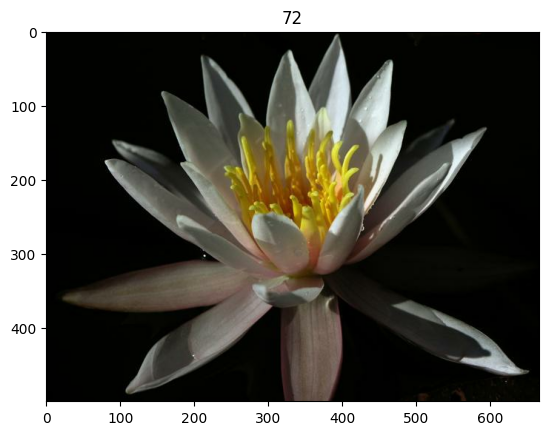

The shape of the image: (500, 667, 3)
The label of the image: 72


In [9]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
for image, label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()

plt.imshow(image)
plt.title(label)
plt.show()

print('The shape of the image:', image.shape)
print('The label of the image:', label)


### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [12]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

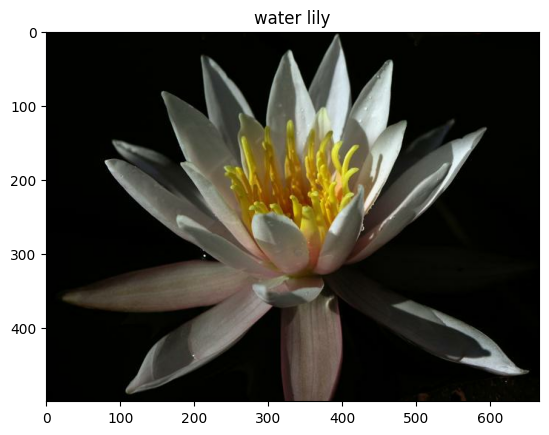

The label of this image is: 72
The class name of this image is: water lily


In [13]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
for image, label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()

plt.imshow(image)
plt.title(class_names[str(label)])
plt.show()

print('The label of this image is:', label)
print('The class name of this image is:', class_names[str(label)])


## Create Pipeline

In [14]:
# TODO: Create a pipeline for each set.
batch_size = 64
image_size = 224


def normalize(image, label): 
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label


training_batches = training_set.shuffle(train_num_example//4).map(normalize).batch(batch_size).prefetch(1)
validation_batches = val_set.map(normalize).batch(batch_size).prefetch(1)
testing_batches = test_set.map(normalize).batch(batch_size).prefetch(1)

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [16]:
tf.keras.backend.clear_session()

In [17]:
# TODO: Build and train your network.
URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"

feature_extractor = hub.KerasLayer(URL , input_shape=(224,224,3))
feature_extractor.trainable = False

layer_neurons = [256, 128]

model = tf.keras.Sequential()
model.add(feature_extractor)

for neurons in layer_neurons:
    model.add(tf.keras.layers.Dense(neurons, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
            
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1792)              4363712   
                                                                 
 dense (Dense)               (None, 256)               459008    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 102)               13158     
                                                                 
Total params: 4868774 (18.57 MB)
Trainable params: 50506

In [18]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 30

history = model.fit(training_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/30
16/16 [==============================] - 22s 693ms/step - loss: 4.5633 - accuracy: 0.0343 - val_loss: 4.1530 - val_accuracy: 0.1647
Epoch 2/30
16/16 [==============================] - 11s 610ms/step - loss: 3.7972 - accuracy: 0.1725 - val_loss: 3.2434 - val_accuracy: 0.3745
Epoch 3/30
16/16 [==============================] - 10s 603ms/step - loss: 2.8110 - accuracy: 0.3765 - val_loss: 2.3131 - val_accuracy: 0.5373
Epoch 4/30
16/16 [==============================] - 10s 586ms/step - loss: 2.0079 - accuracy: 0.5196 - val_loss: 1.7441 - val_accuracy: 0.6471
Epoch 5/30
16/16 [==============================] - 10s 586ms/step - loss: 1.3739 - accuracy: 0.6686 - val_loss: 1.3687 - val_accuracy: 0.7176
Epoch 6/30
16/16 [==============================] - 10s 591ms/step - loss: 0.9864 - accuracy: 0.7529 - val_loss: 1.1770 - val_accuracy: 0.7314
Epoch 7/30
16/16 [==============================] - 10s 591ms/step - loss: 0.7072 - accuracy: 0.8255 - val_loss: 1.0249 - val_accuracy: 0.7549

In [19]:
# We can do data augmentation to have better training

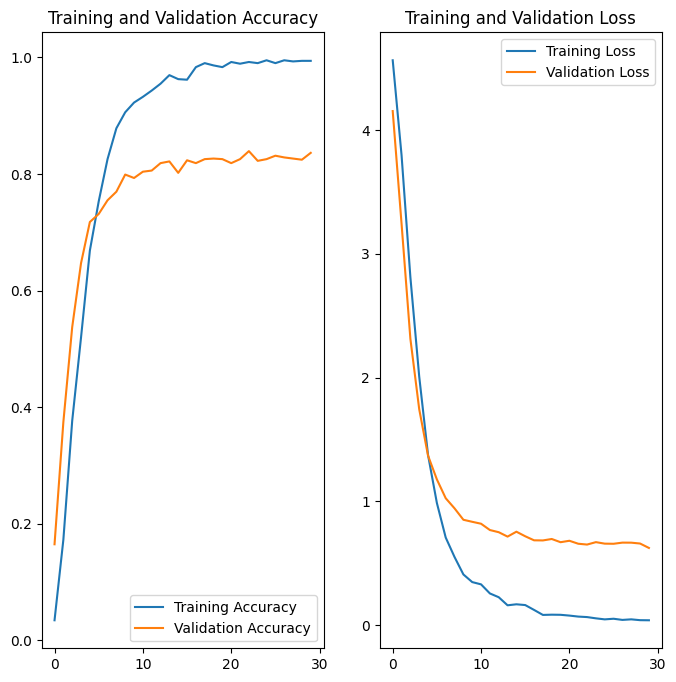

In [20]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [21]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
loss, accuracy = model.evaluate(testing_batches)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))


97/97 [==============================] - 29s 298ms/step - loss: 0.7053 - accuracy: 0.8081

Loss on the TEST Set: 0.705
Accuracy on the TEST Set: 80.810%


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [22]:
# TODO: Save your trained model as a Keras model.
model.save('my_model.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load the Keras Model

Load the Keras model you saved above.

In [23]:
# TODO: Load the Keras model
loaded_model = tf.keras.models.load_model('my_model.h5' , custom_objects={'KerasLayer':hub.KerasLayer})
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1792)              4363712   
                                                                 
 dense (Dense)               (None, 256)               459008    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 102)               13158     
                                                                 
Total params: 4868774 (18.57 MB)
Trainable params: 50506

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [24]:
# TODO: Create the process_image function

def process_image(image):
    image = tf.cast(image, tf.float32)
    # you can also do this for conversion tf.image.convert_image_dtype(x, dtype=tf.float16, saturate=False)
    image = tf.image.resize(image, (image_size, image_size)).numpy()
    image /= 255
    
    return image

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

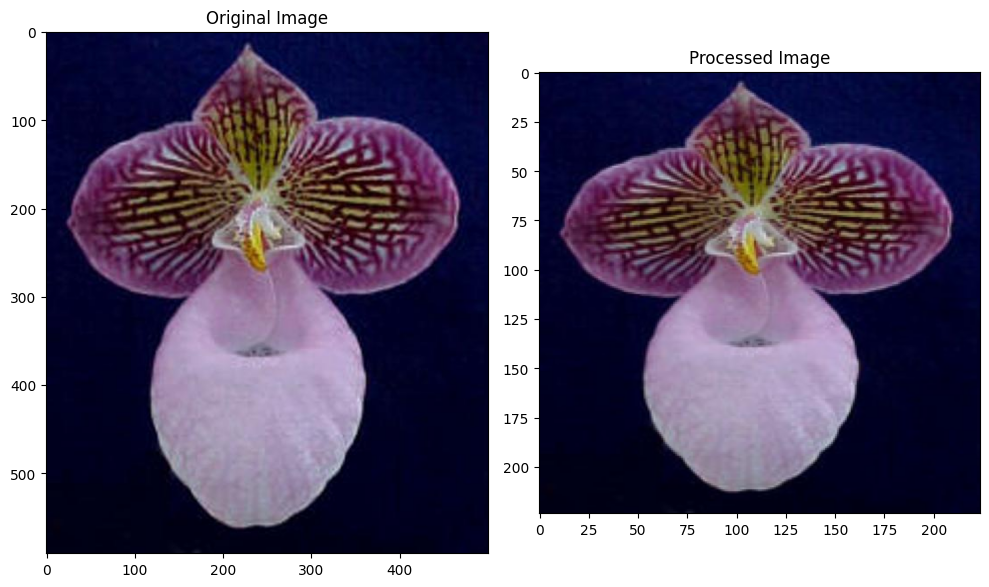

In [25]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [26]:
# TODO: Create the predict function

def predict(image_path, model, top_k):
    image = Image.open(image_path)
    test_image = np.asarray(image)
    processed_test_image = process_image(test_image)
    expanded_test_image = np.expand_dims(processed_test_image, axis=0)
    
    pred_image = model.predict(expanded_test_image)
    values, indices = tf.math.top_k(pred_image, k=top_k)
    probs = values.numpy()[0]
    classes = indices.numpy()[0] + 1
    
    # preapere the result for presenting
    probs = list(probs)
    classes = list(map(str, classes))
    
    return probs, classes

In [27]:
predict(image_path, model, 5)

1/1 [==============================] - 1s 1s/step


([0.99994767, 1.825695e-05, 9.062737e-06, 6.149905e-06, 5.079266e-06],
 ['2', '102', '84', '23', '80'])

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

In [46]:
# TODO: Plot the input image along with the top 5 classes
images = ['cautleya_spicata.jpg', 'orange_dahlia.jpg', 'wild_pansy.jpg']

1/1 [==============================] - 0s 35ms/step


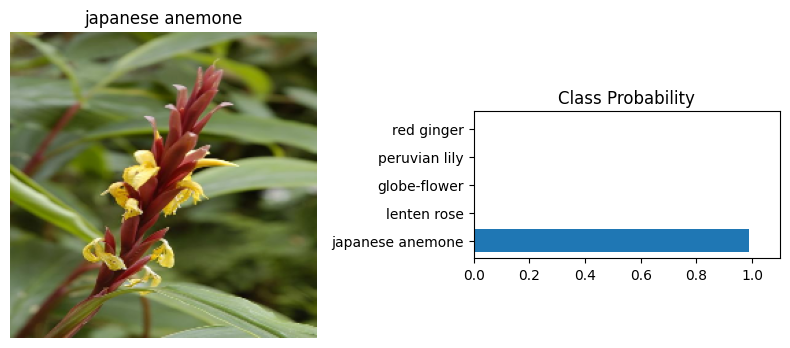

1/1 [==============================] - 0s 30ms/step


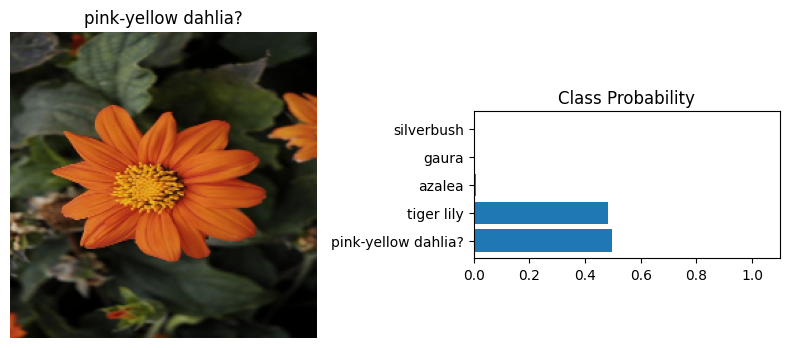

1/1 [==============================] - 0s 38ms/step


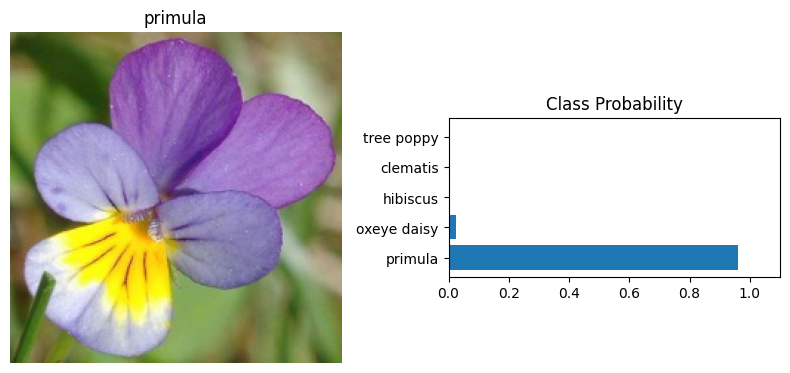

In [47]:
for image in images:
    image_path = './test_images/{}'.format(image)
    probs, classes = predict(image_path, model, 5)
    image_classes = [class_names[label] for label in classes]
    
    im = Image.open(image_path)
    image = np.asarray(im)
    image = process_image(image)

    fig, (ax1, ax2) = plt.subplots(figsize=(8,14), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax1.set_title(image_classes[0])
    ax2.barh(classes, probs)
    ax2.set_aspect(0.1)
    ax2.set_yticks(classes)
    ax2.set_yticklabels(image_classes);
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    plt.show()